In [1]:
index_cd = 'KOSPI'
page_n = 1
naver_index = 'https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page='+ str(page_n)

In [2]:
from urllib.request import urlopen
source = urlopen(naver_index).read()
source

b'<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>\xb3\xd7\xc0\xcc\xb9\xf6 \xb1\xdd\xc0\xb6</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220923165155/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220923165155/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220923165155/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220923165155/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220923165155/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220923165155/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220923165155/css/wor

In [3]:
import bs4
source = bs4.BeautifulSoup(source,'lxml')

In [5]:
print(source.prettify())

<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   네이버 금융
  </title>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20220923165155/css/newstock.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20220923165155/css/common.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20220923165155/css/layout.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20220923165155/css/main.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20220923165155/css/newstock2.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20220923165155/css/newstock3.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20220923165155/css/world.css" rel="stylesheet" type="text/css"/>
 </head

In [6]:
td = source.find_all('td')
len(td)

54

In [7]:
print(td)

[<td class="blank_07" colspan="6"></td>, <td class="date">2022.09.28</td>, <td class="number_1">2,164.76</td>, <td class="rate_down" style="padding-right:35px;">
<img alt="하락" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
				59.10
				</span>
</td>, <td class="number_1">
<span class="tah p11 nv01">
				-2.66%
				</span>
</td>, <td class="number_1" style="padding-right:40px;">288,516</td>, <td class="number_1" style="padding-right:30px;">4,284,764</td>, <td class="date">2022.09.27</td>, <td class="number_1">2,223.86</td>, <td class="rate_down" style="padding-right:35px;">
<img alt="상승" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_up.gif" style="margin-right:4px;" width="7"/><span class="tah p11 red02">
				2.92
				</span>
</td>, <td class="number_1">
<span class="tah p11 red01">
				+0.13%
				</span>
</td>, <td class="number_1" style="padding-right:40px;">487,939</

In [11]:
type(td)

bs4.element.ResultSet

In [13]:
#/html/body/div/table[1]/tbody/tr[3]/td[1]
source.find_all('table')[0].find_all('tr')[2].find_all('td')[0]

<td class="date">2022.09.28</td>

In [20]:
d=source.find_all('td', class_="date")[0].text

In [22]:
d.split('.')

['2022', '09', '28']

In [21]:
import datetime as dt

In [51]:
yyyy = int(d.split('.')[0])
mm = int(d.split('.')[1])
dd =int(d.split('.')[2])
this_date = dt.date(yyyy,mm,dd)
this_date
print(this_date)

2022-09-28


In [22]:
def date_format(d):
    d=str(d).replace('-','.')
    yyyy = int(d.split('.')[0])
    mm = int(d.split('.')[1])
    dd= int(int(d.split('.')[2]))
    this_date = dt.date(yyyy,mm,dd)
    return this_date

In [41]:
#/html/body/div/table[1]/tbody/tr[3]/td[2]
this_close = source.find_all('td', class_="number_1")[0].text
this_close = this_close.replace(',','')
this_close = float(this_close)
this_close


2164.76

In [39]:
source.find_all('td', class_="number_1")[0]

<td class="number_1">2,164.76</td>

In [42]:
dates = source.find_all('td',class_='date')
prices = source.find_all('td',class_='number_1')

In [45]:
len(dates)
#len( prices)

6

In [49]:
for n in range(len(dates)):
    this_date = dates[n].text
    this_date = date_format(this_date)
    this_close = prices[n*4].text
    this_close = this_close.replace(',','')
    this_close = float(this_close)
    print(this_date,this_close)

2022-09-28 2164.76
2022-09-27 2223.86
2022-09-26 2220.94
2022-09-23 2290.0
2022-09-22 2332.31
2022-09-21 2347.21


In [56]:
paging = source.find('td',class_='pgRR').find('a')['href']

In [57]:
paging

'/sise/sise_index_day.naver?code=KOSPI&page=1417'

In [58]:
paging = paging.split('&')[1]
paging

'page=1417'

In [59]:
paging = paging.split('=')[1]

In [60]:
paging

'1417'

In [61]:
last_page = int(paging)
last_page
#https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=

1417

In [23]:
from urllib.request import urlopen
import bs4
import datetime as dt

In [24]:
def historical_index_naver(index_cd, page_n=1,last_page=0):
    naver_index = 'https://finance.naver.com/sise/sise_index_day.naver?code='+ index_cd + '&page=' + str(page_n)
    source = urlopen(naver_index).read()
    source = bs4.BeautifulSoup(source,'lxml')
    dates = source.find_all('td', class_='date')
    prices = source.find_all('td',class_='number_1')
    for n in range(len(dates)):
        if dates[n].text.split('.')[0].isdigit():
            this_date = dates[n].text
            this_date = date_format(this_date)
            this_close = prices[n*4].text
            this_close = this_close.replace(',','')
            this_close = float(this_close)
            historical_prices[this_date] = this_close
    if last_page ==0:
        last_page = source.find('td',class_='pgRR').find('a')['href']
        last_page = last_page.split('&')[1]
        last_page = last_page.split('=')[1]
        last_page = int(last_page)
    if page_n < last_page:
        page_n = page_n +1
        historical_index_naver(index_cd, page_n,last_page)

In [25]:
index_cd = 'KOSPI'
historical_prices = dict()
historical_index_naver(index_cd)
print(historical_prices)

{datetime.date(2022, 10, 7): 2244.65, datetime.date(2022, 10, 6): 2237.86, datetime.date(2022, 10, 5): 2215.22, datetime.date(2022, 10, 4): 2209.38, datetime.date(2022, 9, 30): 2155.49, datetime.date(2022, 9, 29): 2170.93, datetime.date(2022, 9, 28): 2169.29, datetime.date(2022, 9, 27): 2223.86, datetime.date(2022, 9, 26): 2220.94, datetime.date(2022, 9, 23): 2290.0, datetime.date(2022, 9, 22): 2332.31, datetime.date(2022, 9, 21): 2347.21, datetime.date(2022, 9, 20): 2367.85, datetime.date(2022, 9, 19): 2355.66, datetime.date(2022, 9, 16): 2382.78, datetime.date(2022, 9, 15): 2401.83, datetime.date(2022, 9, 14): 2411.42, datetime.date(2022, 9, 13): 2449.54, datetime.date(2022, 9, 8): 2384.28, datetime.date(2022, 9, 7): 2376.46, datetime.date(2022, 9, 6): 2410.02, datetime.date(2022, 9, 5): 2403.68, datetime.date(2022, 9, 2): 2409.41, datetime.date(2022, 9, 1): 2415.61, datetime.date(2022, 8, 31): 2472.05, datetime.date(2022, 8, 30): 2450.93, datetime.date(2022, 8, 29): 2426.89, datetim

In [17]:
import pandas as pd
KOSPI = historical_prices
tmp = {'KOSPI':KOSPI}
df = pd.DataFrame(tmp)
df

,KOSPI
1990-01-04,928.82
1990-01-05,915.11
1990-01-06,912.86
1990-01-08,919.46
1990-01-09,920.21
1990-01-10,911.48
1990-01-11,903.27
1990-01-12,903.11
1990-01-13,893.47
1990-01-15,883.04


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
# a plot display method

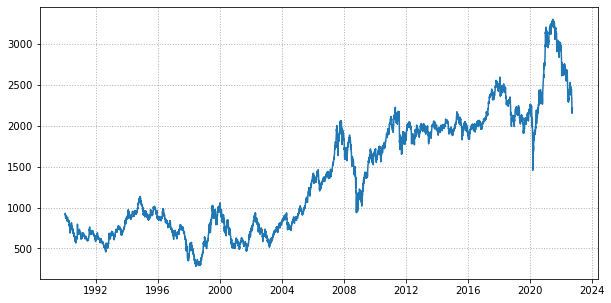

In [19]:
plt.figure(figsize=(10,5))
plt.plot(df['KOSPI'])
plt.grid(True, color = '0.7', linestyle=':',linewidth=1)


In [20]:
df

,KOSPI
1990-01-04,928.82
1990-01-05,915.11
1990-01-06,912.86
1990-01-08,919.46
1990-01-09,920.21
1990-01-10,911.48
1990-01-11,903.27
1990-01-12,903.11
1990-01-13,893.47
1990-01-15,883.04


In [ ]:
ddddd

'/home/maurice/Documents/Programming/Python/파이썬을 활용한 금융공학 레시피/ElementaryFinEngineering'

In [17]:
import pandas as pd
def Dayformat(d=''):
    if d != '':
        today = pd.to_datetime(d).date()
    else:
        today = pd.Timestamp.today().date()
    return(today)

In [19]:
d='1976.6.27'
Dayformat(d)

datetime.date(1976, 6, 27)

In [21]:
#d=NULL
Dayformat()


datetime.date(2022, 10, 7)

In [32]:
from bs4 import BeautifulSoup
import requests
url = "https://www.naver.com"
response  =requests.get(url)
print(response.status_code)

200


In [29]:
html_text = response.text

In [34]:
soup = BeautifulSoup(html_text, 'lxml')

<!DOCTYPE html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title"/>
  <meta content="index,nofollow" name="robots"/>
  <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/>
  <meta content="네이버" property="og:title"/>
  <meta content="https://www.naver.com/" property="og:url"/>
  <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
  <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/>
  <meta content="summary" name="twitter:card"/>
  <meta content="" name="twitter:title"/>
  <meta content="https://www.naver.com/" name="twitter:url"/>
  <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/>
  <meta content="네이버 메인에서
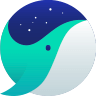
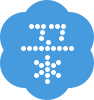

In [35]:
print(soup.prettify())

In [1]:
pwd()


'/home/maurice/Documents/Programming/Python/파이썬을 활용한 금융공학 레시피/ElementaryFinEngineering'

In [45]:
import requests,time
from selenium.webdriver.common.keys import Keys

In [36]:
from selenium import webdriver
driver = webdriver.Chrome('/home/maurice/Downloads/chromedriver_linux64/chromedriver')

In [52]:
driver.get("https://naver.com")

time.sleep(5)
search = driver.find_element_by_xpath('//*[@id="query"]')

search.send_keys('경제학 저장소')
time.sleep(1)
search.send_keys(Keys.ENTER)

driver = webdriver.Chrome('/home/maurice/Downloads/chromedriver_linux64/chromedriver')
driver.get("https://www.naver.com")